# Machine Learning for Many-Body Physics, Tutorial 1:
## Learning the Ising Hamiltonian using linear regression

Perimeter Scholars International 2024-2025

Originally designed by Lauren Hayward

**References:** Section VI.D of https://arxiv.org/abs/1803.08823, and the corresponding Notebook D from https://physics.bu.edu/~pankajm/MLnotebooks.html

## Generate the data set:

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn import linear_model
%matplotlib inline

np.random.seed(2024)

N = 20   #number of spins
M = 1000  #number of samples
J = 1.0  #coupling energy for generating the data

#Randomly generate the spin configurations
s = np.random.choice([-1,1], size=(M,N))

def getEnergy_nnIsing1D(s):
  # return np.zeros(s.shape[0]) #Modify this line for part d)
    return -J*np.sum(s*np.roll(s,-1,axis=1),axis=1)

H = getEnergy_nnIsing1D(s) #Labels for each configuration

# Introduce the variable x as in part c: s_j*s_k --> x_p
# x = np.zeros((M,N,N)) #Modify this line for part e)
x = np.einsum('ij,ik->ijk', s, s)

#Consider only the upper triangular part of this matrix since we only want to consider k>j:
iu = np.triu_indices(x.shape[1],k=1)
x = x[:,iu[0],iu[1]]

## Define a function to plot the coupling parameters $J_{jk}$

In [11]:
def plot_J(w,N):
  J = np.zeros((N,N))

  #Fill in the upper triangular part with entries from w:
  iu = np.triu_indices(N,k=1)
  J[iu] = -1.0*w

  #Plot this matrix:
  max_Jmag = max(np.max(J),-1*np.min(J))
  cmap_args=dict(vmin=min(-1.,-1*max_Jmag), vmax=max(1.,max_Jmag), cmap='PRGn')

  fig, ax = plt.subplots()
  im      = ax.imshow(J,**cmap_args)
  ax.set_title(r'$J_{jk}$',fontsize=18)

  divider = make_axes_locatable(ax)
  cax = divider.append_axes("right", size="5%", pad=0.1)
  cbar=fig.colorbar(im, cax=cax)

  plt.show()

## Find the parameters $J_{jk}$ using the exact solution

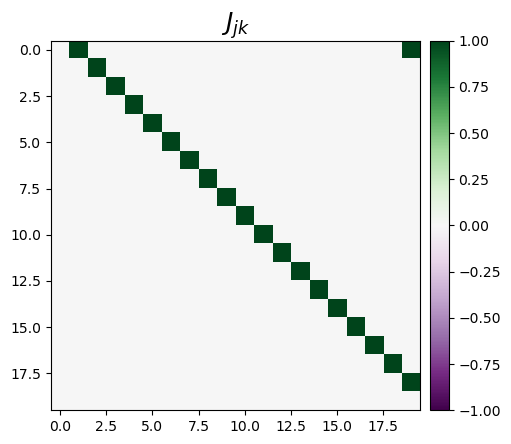

CPU times: user 698 ms, sys: 915 ms, total: 1.61 s
Wall time: 239 ms


In [13]:
%%time
# w_exact = np.zeros(x.shape[1]) #Modify this line for part f)
w_exact = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(H)
plot_J(w_exact,N)

## Find the parameters $J_{jk}$ using gradient descent

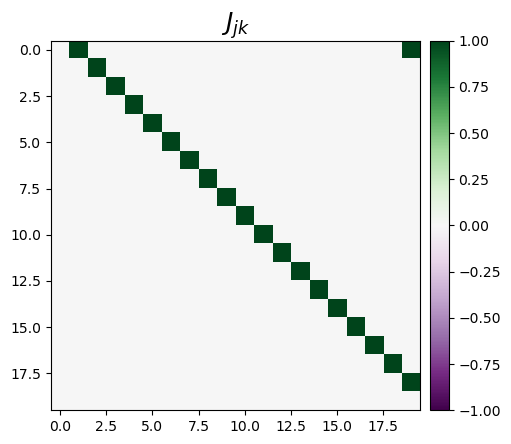

CPU times: user 295 ms, sys: 18.4 ms, total: 313 ms
Wall time: 135 ms


In [14]:
%%time
w_init = 2*np.random.rand(x.shape[1])-1 #initialize the w parameters randomly

#Apply gradient descent with a constant learning rate of eta0:
w_GD = linear_model.SGDRegressor(penalty=None, learning_rate='constant', eta0=0.001).fit(x, H, coef_init=w_init).coef_
plot_J(w_GD,N)

## Using sklearn package

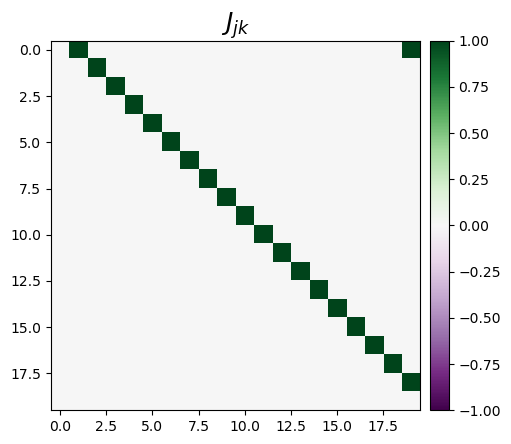

In [15]:
w_exact = linear_model.LinearRegression().fit(x, H).coef_ #Solution to part j)
# print(w_exact)
plot_J(w_exact,N)

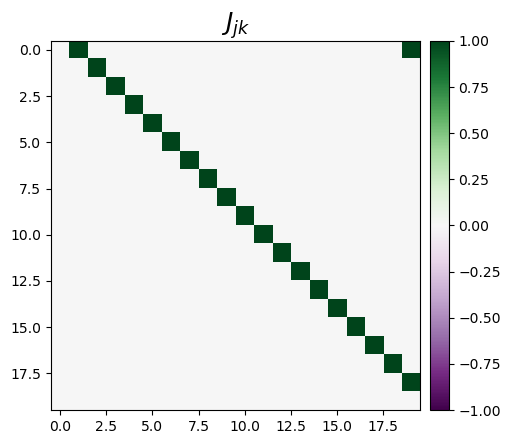

CPU times: user 339 ms, sys: 41.5 ms, total: 380 ms
Wall time: 226 ms


In [17]:
%%time

w_init = 2*np.random.rand(x.shape[1])-1 #initialize the w parameters randomly

#Apply gradient descent with a constant learning rate of eta0:
#w_GD = linear_model.SGDRegressor(penalty=None, learning_rate='constant', eta0=0.001).fit(x, H, coef_init=w_init).coef_
w_GD = linear_model.SGDRegressor().fit(x, H, coef_init=w_init).coef_ #Solution to part j)
plot_J(w_GD,N)